In [171]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [174]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [167]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [175]:
fid = drive.ListFile({'q':"title='Solution.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Solution.zip')

In [176]:
f.keys()

dict_keys(['id', 'kind', 'userPermission', 'fileExtension', 'md5Checksum', 'selfLink', 'ownerNames', 'lastModifyingUserName', 'editable', 'writersCanShare', 'downloadUrl', 'mimeType', 'parents', 'appDataContents', 'iconLink', 'shared', 'lastModifyingUser', 'owners', 'headRevisionId', 'copyable', 'etag', 'alternateLink', 'embedLink', 'webContentLink', 'fileSize', 'copyRequiresWriterPermission', 'spaces', 'title', 'labels', 'explicitlyTrashed', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'quotaBytesUsed', 'version', 'originalFilename', 'capabilities'])

In [177]:
!unzip Solution.zip

Archive:  Solution.zip
replace Solution/test/Ace/modified158.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Solution/test/Ace/modified159.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Solution/test/Ace/modified160.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [178]:
PATH = '/content/Solution'

In [179]:
os.listdir(PATH)

['checkpoint',
 'ex2.index',
 'luffy.jpg',
 'valid',
 'train',
 'test',
 'ex2.data-00000-of-00001',
 'ex2.json',
 'CXR.json',
 'CXR.h5']

In [180]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [181]:
train_Ace_dir = os.path.join(train_dir,
                                'Ace')
train_Akainu_dir = os.path.join(train_dir,
                                   'Akainu')
train_Brook_dir = os.path.join(train_dir,
                               'Brook')
train_Chopper_dir = os.path.join(train_dir,
                                'Chopper')
train_Crocodile_dir = os.path.join(train_dir,
                                   'Crocodile')
train_Franky_dir = os.path.join(train_dir,
                               'Franky')
train_Jinbei_dir = os.path.join(train_dir,
                                'Jinbei')
train_Kurohige_dir = os.path.join(train_dir,
                                   'Kurohige')
train_Law_dir = os.path.join(train_dir,
                               'Law')
train_Luffy_dir = os.path.join(train_dir,
                                'Luffy')
train_Mihawk_dir = os.path.join(train_dir,
                                   'Mihawk')
train_Nami_dir = os.path.join(train_dir,
                               'Nami')
train_Rayleigh_dir = os.path.join(train_dir,
                                'Rayleigh')
train_Robin_dir = os.path.join(train_dir,
                                   'Robin')
train_Sanji_dir = os.path.join(train_dir,
                               'Sanji')

train_Shanks_dir = os.path.join(train_dir,
                               'Shanks')
train_Usopp_dir = os.path.join(train_dir,
                               'Usopp')
train_Zoro_dir = os.path.join(train_dir,
                                  'Zoro')


test_Ace_dir = os.path.join(test_dir,
                                'Ace')
test_Akainu_dir = os.path.join(test_dir,
                                   'Akainu')
test_Brook_dir = os.path.join(test_dir,
                               'Brook')
test_Chopper_dir = os.path.join(test_dir,
                                'Chopper')
test_Crocodile_dir = os.path.join(test_dir,
                                   'Crocodile')
test_Franky_dir = os.path.join(test_dir,
                               'Franky')
test_Jinbei_dir = os.path.join(test_dir,
                                'Jinbei')
test_Kurohige_dir = os.path.join(test_dir,
                                   'Kurohige')
test_Law_dir = os.path.join(test_dir,
                               'Law')
test_Luffy_dir = os.path.join(test_dir,
                                'Luffy')
test_Mihawk_dir = os.path.join(test_dir,
                                   'Mihawk')
test_Nami_dir = os.path.join(test_dir,
                               'Nami')
test_Rayleigh_dir = os.path.join(test_dir,
                                'Rayleigh')
test_Robin_dir = os.path.join(test_dir,
                                   'Robin')
test_Sanji_dir = os.path.join(test_dir,
                               'Sanji')

test_Shanks_dir = os.path.join(test_dir,
                               'Shanks')
test_Usopp_dir = os.path.join(test_dir,
                               'Usopp')
test_Zoro_dir = os.path.join(test_dir,
                                  'Zoro')


In [182]:
len(os.listdir(train_Ace_dir))

528

In [183]:
len(os.listdir(test_Shanks_dir))

60

In [184]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 32

In [185]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [186]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 9577 images belonging to 18 classes.


In [187]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 1080 images belonging to 18 classes.


In [188]:
sample_training_images, _ = next(train_data_gen)

In [189]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

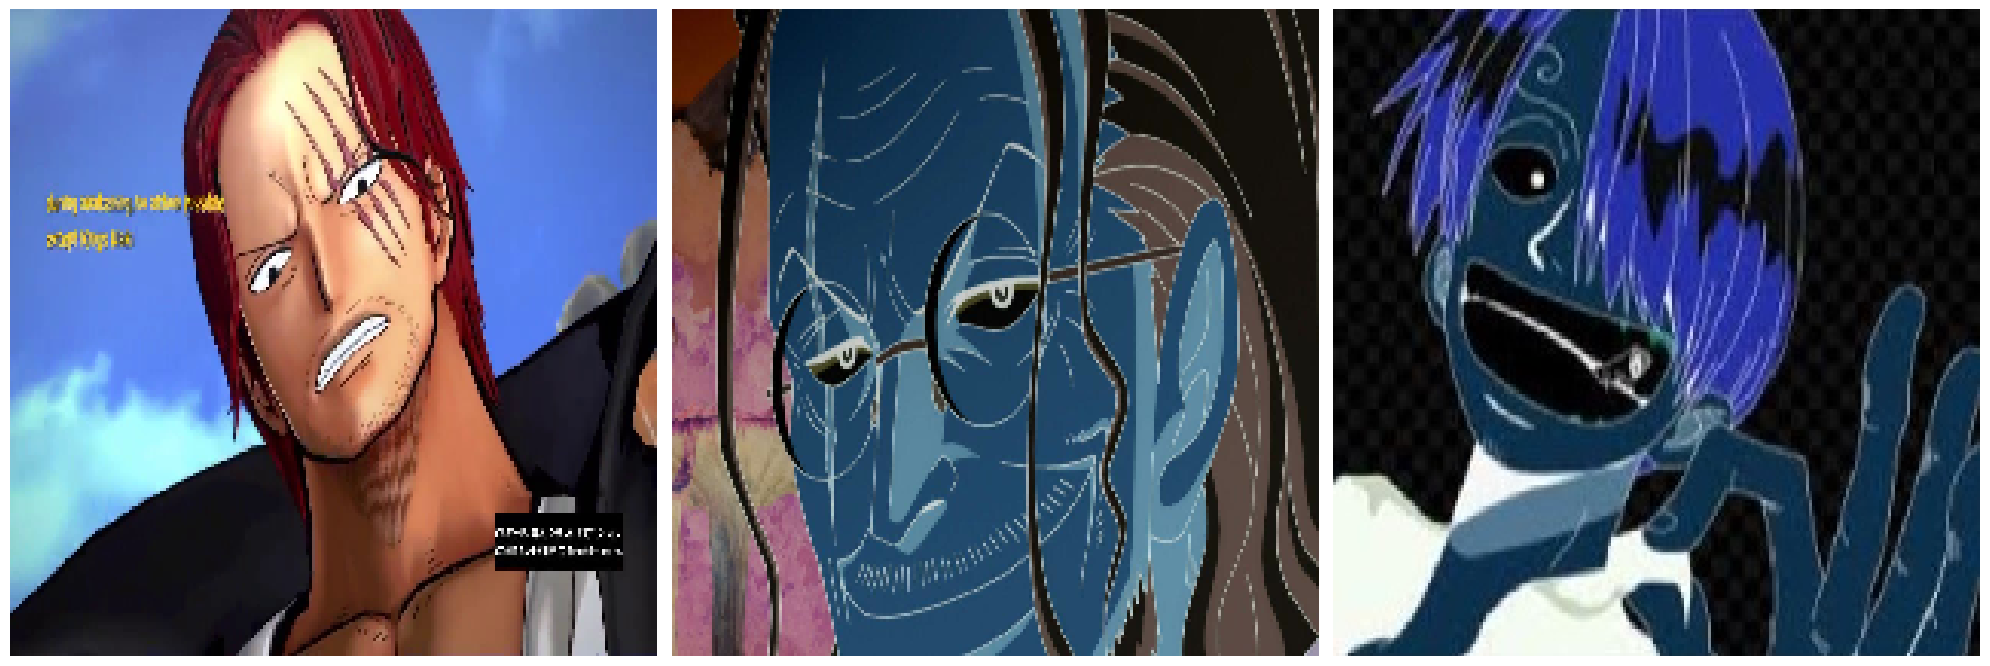

In [190]:
plotImages(sample_training_images[:3])

In [191]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [192]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [193]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 212, 212, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 106, 106, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 106, 106, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 53, 53, 64)       

In [227]:
batch_size = 64
epochs = 10

In [228]:
num_Ace_train = len(os.listdir(train_Ace_dir))
num_Akainu_train = len(os.listdir(train_Akainu_dir))
num_Brook_train = len(os.listdir(train_Brook_dir))

num_Chopper_train = len(os.listdir(train_Chopper_dir))
num_Crocodile_train = len(os.listdir(train_Crocodile_dir))
num_Franky_train = len(os.listdir(train_Franky_dir))

num_Jinbei_train = len(os.listdir(train_Jinbei_dir))
num_Kurohige_train = len(os.listdir(train_Kurohige_dir))
num_Law_train = len(os.listdir(train_Law_dir))

num_Luffy_train = len(os.listdir(train_Luffy_dir))
num_Mihawk_train = len(os.listdir(train_Mihawk_dir))
num_Nami_train = len(os.listdir(train_Nami_dir))

num_Rayleigh_train = len(os.listdir(train_Rayleigh_dir))
num_Robin_train = len(os.listdir(train_Robin_dir))
num_Sanji_train = len(os.listdir(train_Sanji_dir))

num_Shanks_train = len(os.listdir(train_Shanks_dir))
num_Usopp_train = len(os.listdir(train_Usopp_dir))
num_Zoro_train = len(os.listdir(train_Zoro_dir))




num_Ace_test = len(os.listdir(test_Ace_dir))
num_Akainu_test = len(os.listdir(test_Akainu_dir))
num_Brook_test = len(os.listdir(test_Brook_dir))

num_Chopper_test = len(os.listdir(test_Chopper_dir))
num_Crocodile_test = len(os.listdir(test_Crocodile_dir))
num_Franky_test = len(os.listdir(test_Franky_dir))

num_Jinbei_test = len(os.listdir(test_Jinbei_dir))
num_Kurohige_test = len(os.listdir(test_Kurohige_dir))
num_Law_test = len(os.listdir(test_Law_dir))

num_Luffy_test = len(os.listdir(test_Luffy_dir))
num_Mihawk_test = len(os.listdir(test_Mihawk_dir))
num_Nami_test = len(os.listdir(test_Nami_dir))

num_Rayleigh_test = len(os.listdir(test_Rayleigh_dir))
num_Robin_test = len(os.listdir(test_Robin_dir))
num_Sanji_test = len(os.listdir(test_Sanji_dir))

num_Shanks_test = len(os.listdir(test_Shanks_dir))
num_Usopp_test = len(os.listdir(test_Usopp_dir))
num_Zoro_test = len(os.listdir(test_Zoro_dir))


total_train = num_Ace_train + num_Akainu_train + num_Brook_train + num_Chopper_train+ num_Crocodile_train + num_Franky_train + num_Jinbei_train + num_Kurohige_train + num_Law_train + num_Luffy_train + num_Mihawk_train + num_Nami_train +  num_Rayleigh_train +  num_Robin_train +  num_Sanji_train + num_Shanks_train + num_Usopp_train + num_Zoro_train
total_test = num_Ace_test + num_Akainu_test + num_Brook_test + num_Chopper_test+ num_Crocodile_test + num_Franky_test + num_Jinbei_test + num_Kurohige_test + num_Law_test + num_Luffy_test + num_Mihawk_test + num_Nami_test + num_Rayleigh_test + num_Robin_test + num_Sanji_test + num_Shanks_test+ num_Usopp_test + num_Zoro_test

In [229]:

num_classes = 18  # Replace with the actual number of characters
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Recompile the model after the change
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [230]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

Epoch 1/10
149/149 [==============================] - 344s 2s/step - loss: 2.8922 - accuracy: 0.0512 - val_loss: 2.8907 - val_accuracy: 0.0568
Epoch 2/10
149/149 [==============================] - 354s 2s/step - loss: 2.8910 - accuracy: 0.0533 - val_loss: 2.8907 - val_accuracy: 0.0568
Epoch 3/10
149/149 [==============================] - 340s 2s/step - loss: 2.8908 - accuracy: 0.0537 - val_loss: 2.8908 - val_accuracy: 0.0568
Epoch 4/10
149/149 [==============================] - 337s 2s/step - loss: 2.8910 - accuracy: 0.0540 - val_loss: 2.8905 - val_accuracy: 0.0549
Epoch 5/10
149/149 [==============================] - 341s 2s/step - loss: 2.8907 - accuracy: 0.0539 - val_loss: 2.8907 - val_accuracy: 0.0559
Epoch 6/10
149/149 [==============================] - 343s 2s/step - loss: 2.8908 - accuracy: 0.0541 - val_loss: 2.8905 - val_accuracy: 0.0568
Epoch 7/10
149/149 [==============================] - 353s 2s/step - loss: 2.8909 - accuracy: 0.0561 - val_loss: 2.8908 - val_accuracy: 0.0540

In [213]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [214]:
from PIL import Image

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
#data loader
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset

root_dir = "Solution/"  # 18 classes
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder(root_dir + 'train', transform)
valid_data = datasets.ImageFolder(root_dir + 'valid', transform)
test_data = datasets.ImageFolder(root_dir + 'test', transform)

print("Class18idx: ", train_data.class_to_idx)
print('Train images :', len(train_data))
print('Valid images :', len(valid_data))
print('Test images :', len(test_data))

batch_size = 16
dataloaders = {}

dataloaders['train'] = DataLoader(train_data, batch_size=batch_size, shuffle=True)
dataloaders['valid'] = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
dataloaders['test'] = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Class18idx:  {'Ace': 0, 'Akainu': 1, 'Brook': 2, 'Chopper': 3, 'Crocodile': 4, 'Franky': 5, 'Jinbei': 6, 'Kurohige': 7, 'Law': 8, 'Luffy': 9, 'Mihawk': 10, 'Nami': 11, 'Rayleigh': 12, 'Robin': 13, 'Sanji': 14, 'Shanks': 15, 'Usopp': 16, 'Zoro': 17}
Train images : 9577
Valid images : 1080
Test images : 1080


In [221]:
#classes= ['Ace ,Akainu ,Brook ,Chopper ,Crocodile ,Franky ,Jinbei ,Kurohige ,Law ,Luffy ,Mihawk ,Nami ,Rayleigh ,Robin ,Sanji ,Shanks ,Usopp ,Zoro']
def classify_one_image(img_path, model, classes):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(212, 212))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict the class
    predictions = model.predict(img_array)
    print("Predictions:", predictions)
    print("Argmax index:", np.argmax(predictions))

    # Get the predicted class
    predicted_class = classes[np.argmax(predictions)]

    # Display the image and prediction
    plt.imshow(image.load_img(img_path, target_size=(212, 212)))
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()





1/1 [==============================] - 0s 38ms/step
Predictions: [[0.05538964 0.05862404 0.05321237 0.05417126 0.05530672 0.05401498
  0.05789801 0.05533217 0.0537984  0.05502939 0.05625264 0.05606575
  0.05435757 0.05756546 0.05697997 0.0557041  0.05478124 0.05551628]]
Argmax index: 1


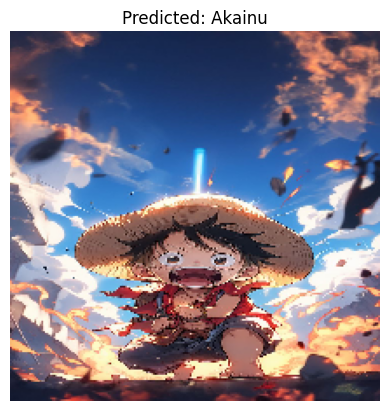

In [222]:
# Example usage
#img_path = '/content/Solution/drive/MyDrive/Colab Notebooks/luffy.jpg'  # Update this path
classify_one_image('/content/Solution/luffy.jpg', model, train_data.classes)